In [1]:
!git clone https://github.com/modelscope/DiffSynth-Studio.git
%cd DiffSynth-Studio
!pip install -e .

正克隆到 'DiffSynth-Studio'...
remote: Enumerating objects: 2280, done.
remote: Counting objects: 100% (850/850), done.
remote: Compressing objects: 100% (329/329), done.
remote: Total 2280 (delta 610), reused 593 (delta 513), pack-reused 1430 (from 1)
接收对象中: 100% (2280/2280), 6.10 MiB | 4.11 MiB/s, 完成.
处理 delta 中: 100% (1447/1447), 完成.
正在更新文件: 100% (216/216), 完成.
/mnt/workspace/DiffSynth-Studio
Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
Obtaining file:///mnt/workspace/DiffSynth-Studio
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 MB 12.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 2.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.0 MB/s eta 0:00:00
  Created wheel for controlnet-aux: filename=controlnet_aux-0.0.7-py3-none-any.whl size=274356 sha256=1b36b174b7ed5384cf45716612d951ecb4e2f9701786

In [2]:
import torch
from diffsynth import ModelManager, OmnigenImagePipeline


model_manager = ModelManager(torch_dtype=torch.bfloat16, model_id_list=["OmniGen-v1"])
pipe = OmnigenImagePipeline.from_model_manager(model_manager)

2024-11-22 10:35:28.909526: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 10:35:28.951144: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-22 10:35:29.735378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


    Start downloading models/OmniGen/OmniGen-v1/vae/diffusion_pytorch_model.safetensors


    Start downloading models/OmniGen/OmniGen-v1/model.safetensors


    Start downloading models/OmniGen/OmniGen-v1/config.json


    Start downloading models/OmniGen/OmniGen-v1/special_tokens_map.json


    Start downloading models/OmniGen/OmniGen-v1/tokenizer_config.json


    Start downloading models/OmniGen/OmniGen-v1/tokenizer.json


Loading models from: models/OmniGen/OmniGen-v1/vae/diffusion_pytorch_model.safetensors
    model_name: sdxl_vae_encoder model_class: SDXLVAEEncoder
        This model is initialized with extra kwargs: {'upcast_to_float32': True}
    model_name: sdxl_vae_decoder model_class: SDXLVAEDecoder
        This model is initialized with extra kwargs: {'upcast_to_float32': True}
    The following models are loaded: ['sdxl_vae_encoder', 'sdxl_vae_decoder'].
Loading models from: models/OmniGen/OmniGen-v1/model.safetensors
    model_name: omnigen_transformer model_class: OmniGenTransformer
    The following models are loaded: ['omnigen_transformer'].
Using omnigen_transformer from models/OmniGen/OmniGen-v1/model.safetensors.
Using sdxl_vae_decoder from models/OmniGen/OmniGen-v1/vae/diffusion_pytorch_model.safetensors.
Using sdxl_vae_encoder from models/OmniGen/OmniGen-v1/vae/diffusion_pytorch_model.safetensors.


100%|██████████| 50/50 [02:12<00:00,  2.65s/it]


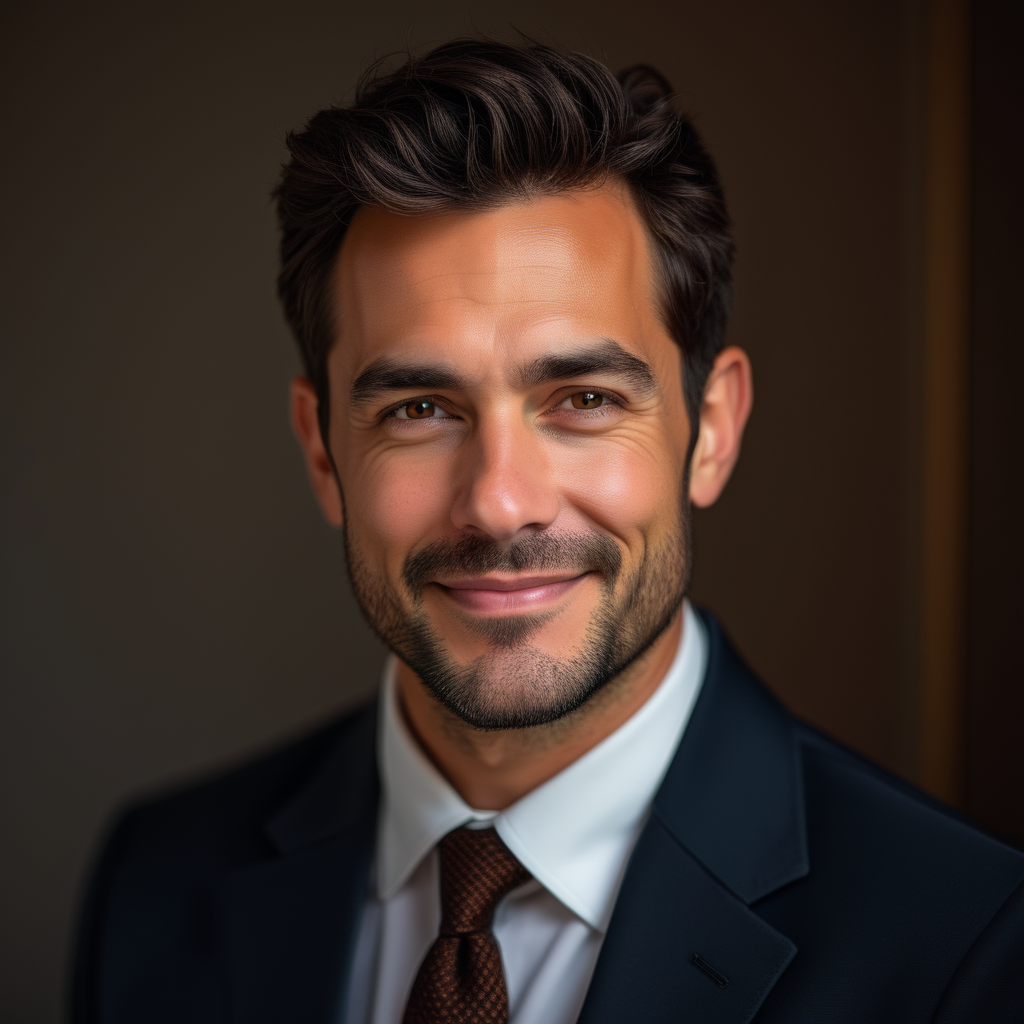

In [3]:
image_man = pipe(
    prompt="A portrait of a man.",
    cfg_scale=2.5, num_inference_steps=50, seed=0
)
image_man

100%|██████████| 50/50 [02:10<00:00,  2.61s/it]


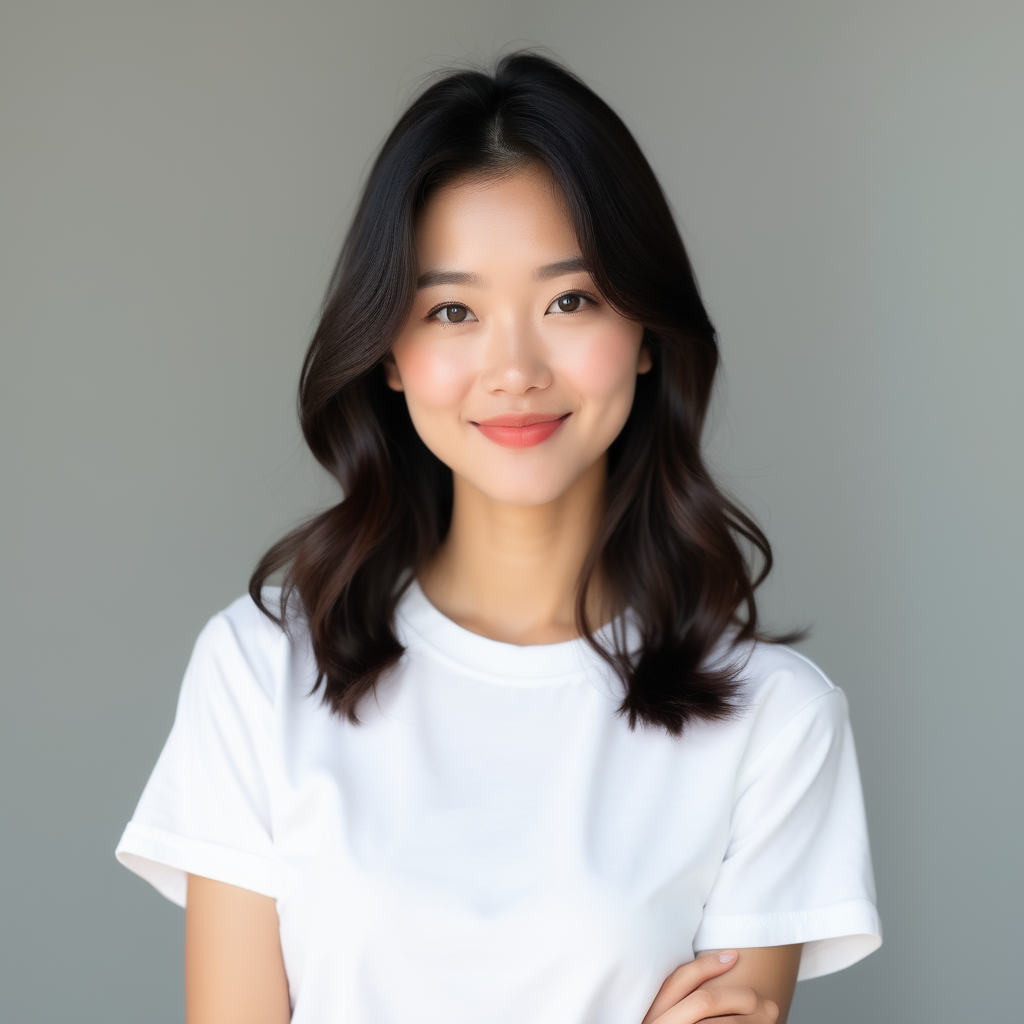

In [4]:
image_woman = pipe(
    prompt="A portrait of an Asian woman with a white t-shirt.",
    cfg_scale=2.5, num_inference_steps=50, seed=1
)
image_woman

100%|██████████| 50/50 [03:26<00:00,  4.13s/it]


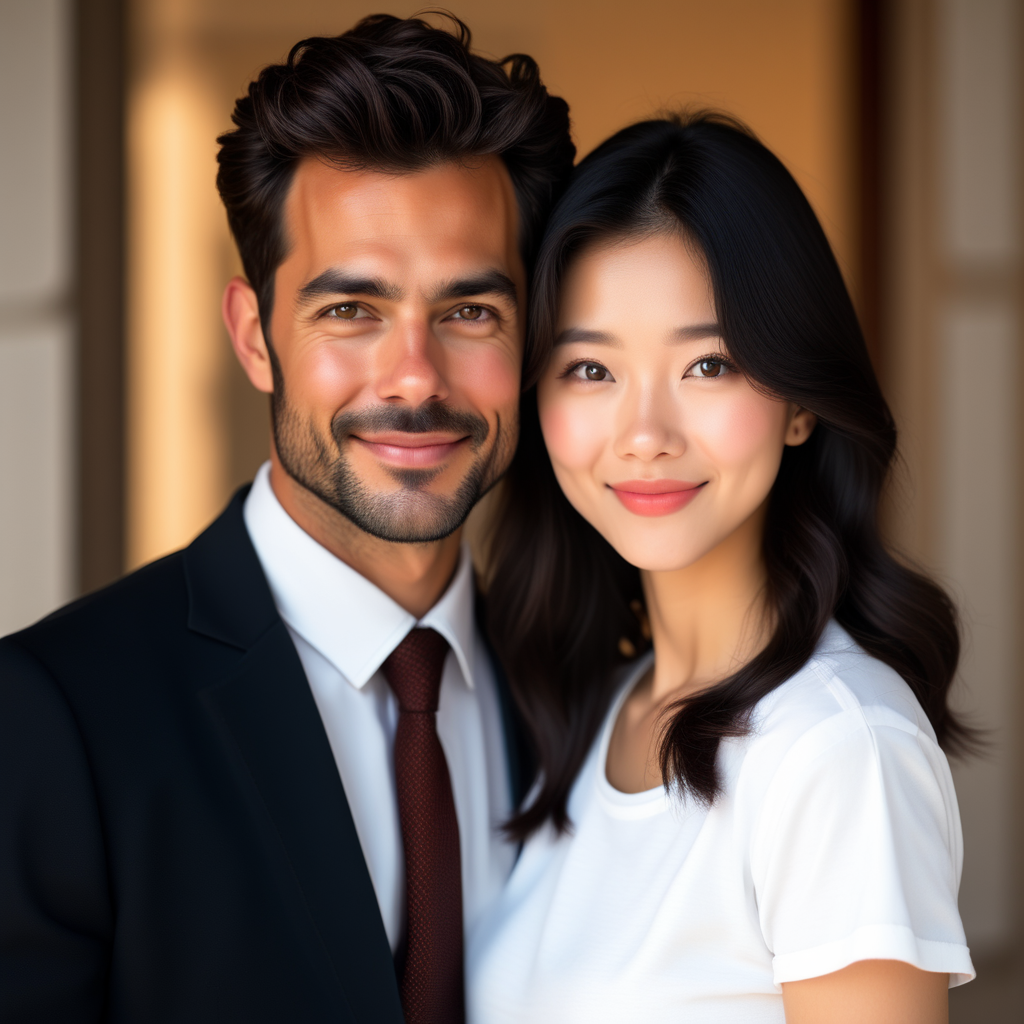

In [5]:
image_merged = pipe(
    prompt="a man and a woman. The man is the man in <img><|image_1|></img>. The woman is the woman in <img><|image_2|></img>.",
    reference_images=[image_man, image_woman],
    cfg_scale=2.5, image_cfg_scale=2.5, num_inference_steps=50, seed=2
)
image_merged